In [ ]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten

In [ ]:
count = 0
dirs = os.listdir('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images')
for dir in dirs:
    files = list(os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images', dir)))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Medical Leaf Folder has '+ str(count) + ' Images')

Amaranthus Viridis (Arive-Dantu) Folder has 122 Images
Artocarpus Heterophyllus (Jackfruit) Folder has 56 Images
Azadirachta Indica (Neem) Folder has 60 Images
Basella Alba (Basale) Folder has 103 Images
Brassica Juncea (Indian Mustard) Folder has 34 Images
Carissa Carandas (Karanda) Folder has 74 Images
Citrus Limon (Lemon) Folder has 57 Images
Ficus Auriculata (Roxburgh fig) Folder has 50 Images
Ficus Religiosa (Peepal Tree) Folder has 63 Images
Hibiscus Rosa-sinensis Folder has 43 Images
Jasminum (Jasmine) Folder has 71 Images
Mangifera Indica (Mango) Folder has 62 Images
Mentha (Mint) Folder has 97 Images
Moringa Oleifera (Drumstick) Folder has 77 Images
Muntingia Calabura (Jamaica Cherry-Gasagase) Folder has 56 Images
Murraya Koenigii (Curry) Folder has 60 Images
Nerium Oleander (Oleander) Folder has 62 Images
Nyctanthes Arbor-tristis (Parijata) Folder has 40 Images
Ocimum Tenuiflorum (Tulsi) Folder has 52 Images
Piper Betle (Betel) Folder has 48 Images
Plectranthus Amboinicus (Me

## #Load Images into Arrays as Dataset

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/'
img_size = 180
batch = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 1835 files belonging to 30 classes.
Using 1468 files for training.
Found 1835 files belonging to 30 classes.
Using 367 files for validation.


In [ ]:
Plant_names = train_ds.class_names
Plant_names

['Alpinia Galanga (Rasna)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Azadirachta Indica (Neem)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Carissa Carandas (Karanda)',
 'Citrus Limon (Lemon)',
 'Ficus Auriculata (Roxburgh fig)',
 'Ficus Religiosa (Peepal Tree)',
 'Hibiscus Rosa-sinensis',
 'Jasminum (Jasmine)',
 'Mangifera Indica (Mango)',
 'Mentha (Mint)',
 'Moringa Oleifera (Drumstick)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Murraya Koenigii (Curry)',
 'Nerium Oleander (Oleander)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Piper Betle (Betel)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Pongamia Pinnata (Indian Beech)',
 'Psidium Guajava (Guava)',
 'Punica Granatum (Pomegranate)',
 'Santalum Album (Sandalwood)',
 'Syzygium Cumini (Jamun)',
 'Syzygium Jambos (Rose Apple)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Trigonella Foenum-graecum (Fenugreek)']

In [ ]:
import matplotlib.pyplot as plt

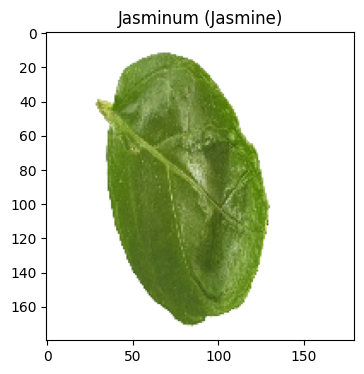

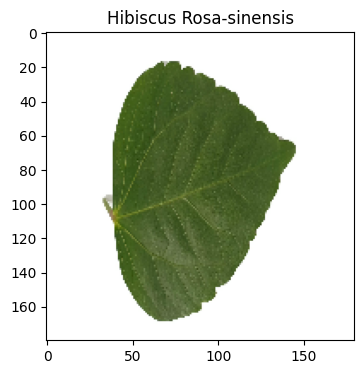

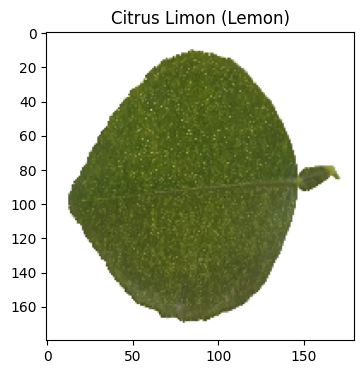

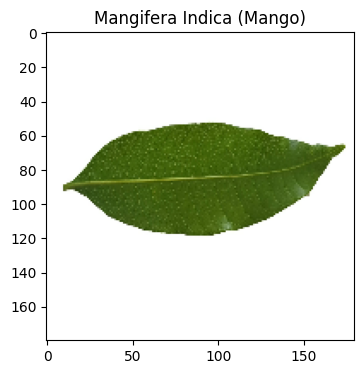

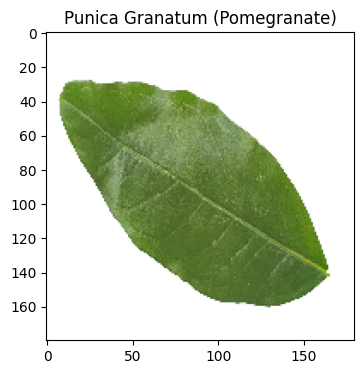

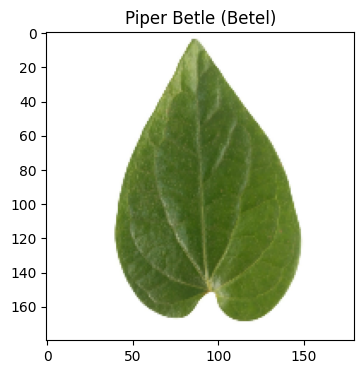

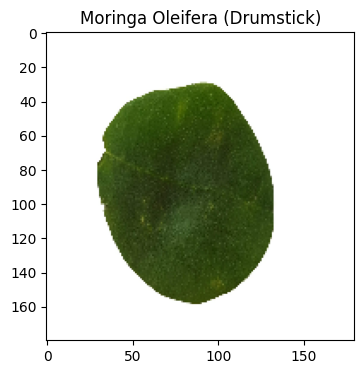

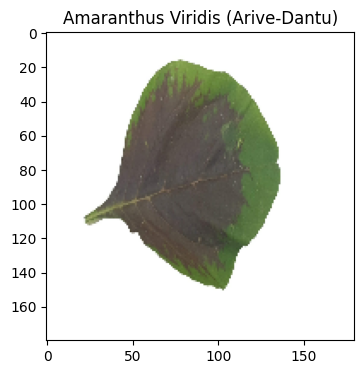

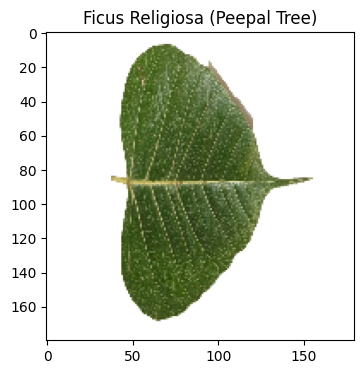

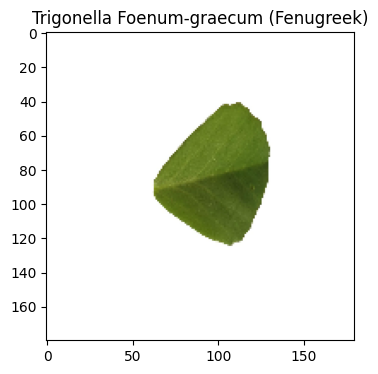

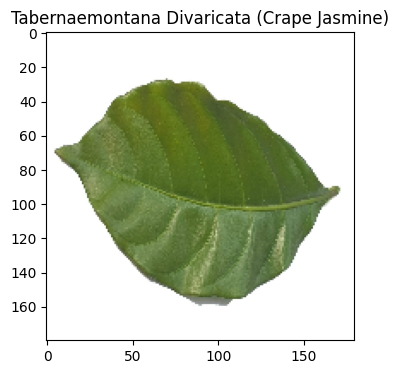

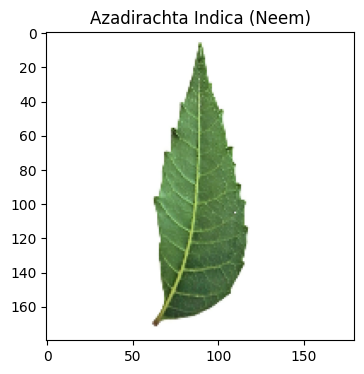

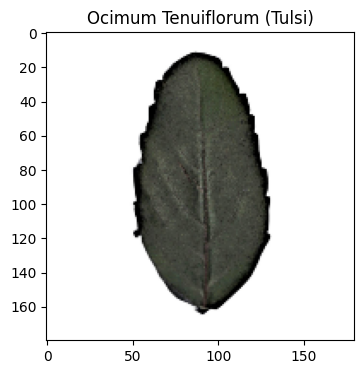

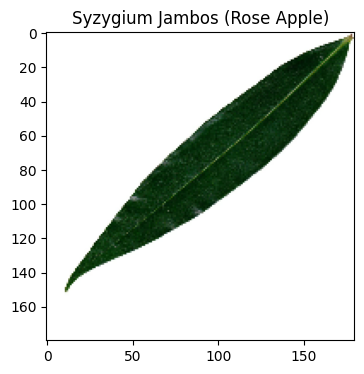

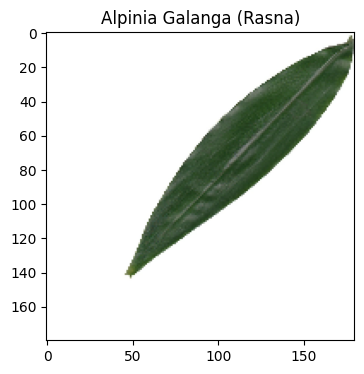

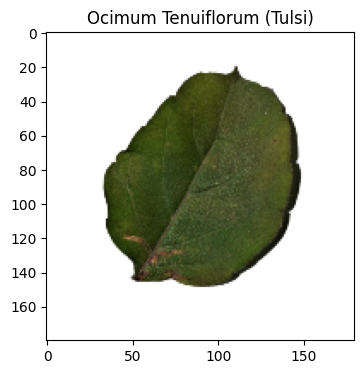

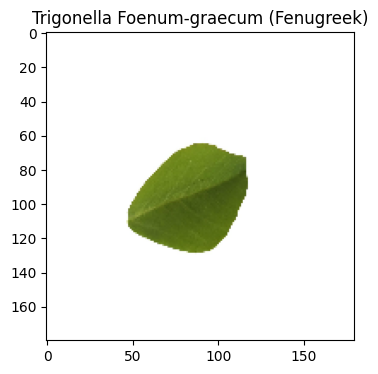

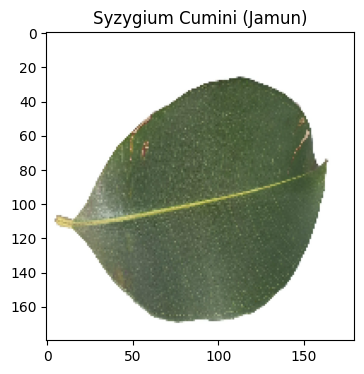

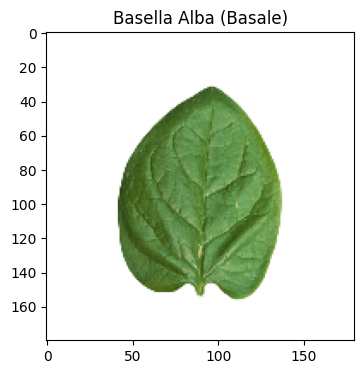

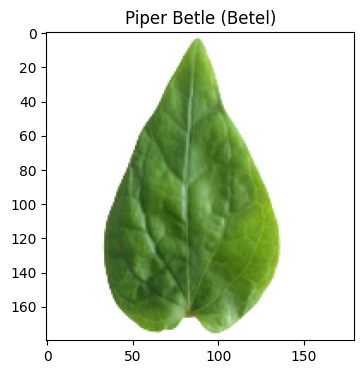

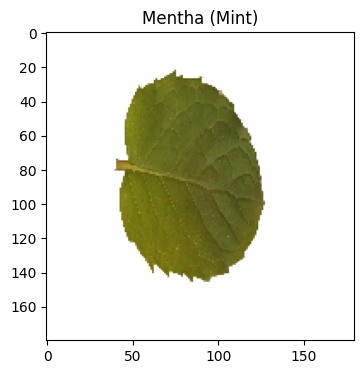

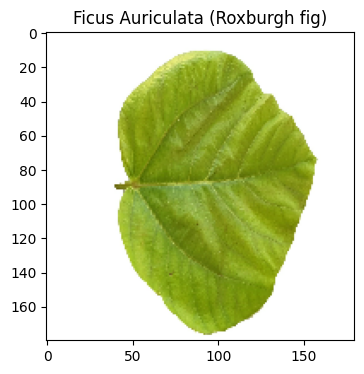

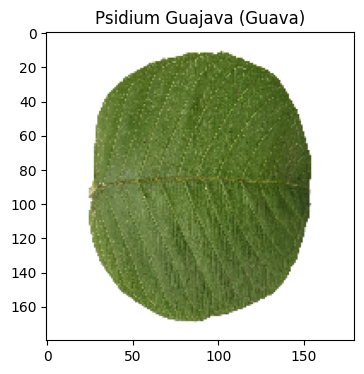

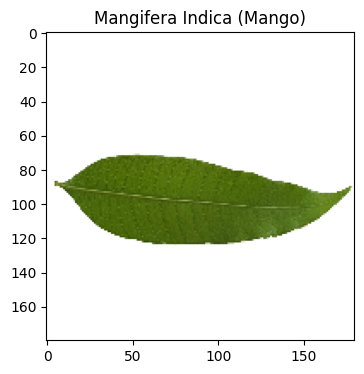

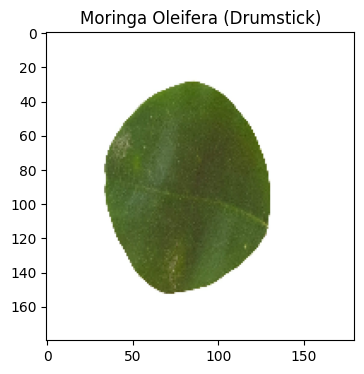

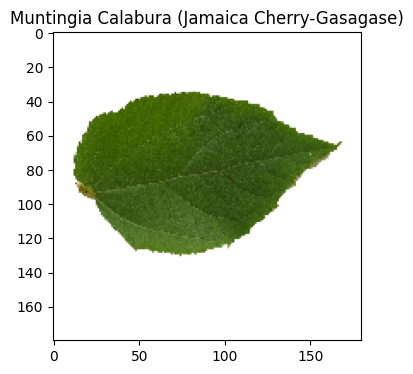

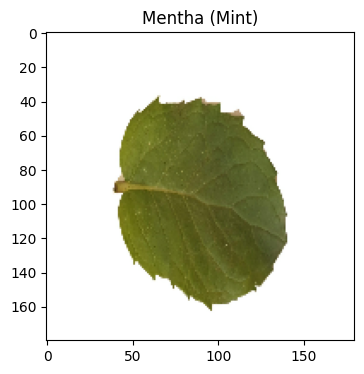

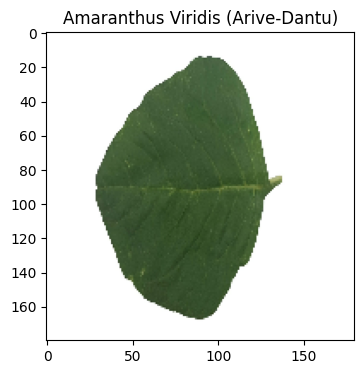

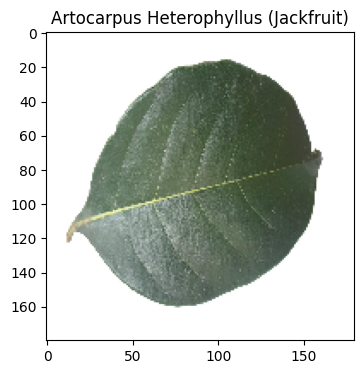

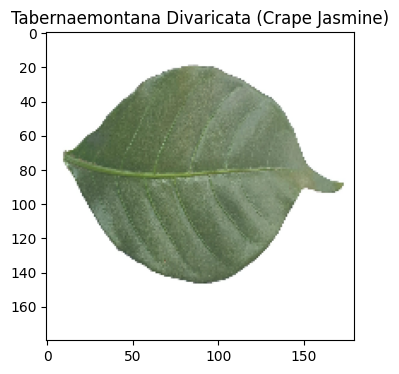

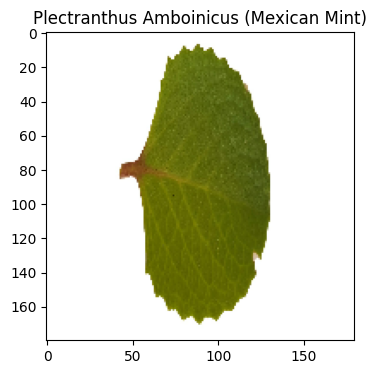

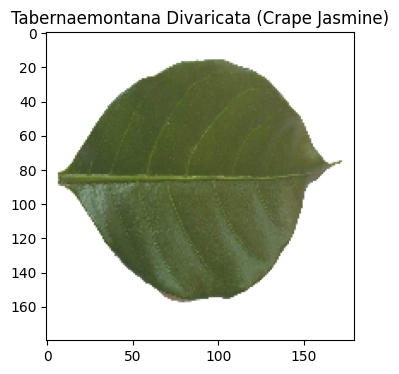

In [ ]:
# Display images of different leaves along with their labels separately
for images, labels in train_ds.take(1):  # Take a single batch of images and labels
    for i in range(len(images)):  # Loop through all images in the batch
        plt.figure(figsize=(4, 4))  # Create a separate figure for each image
        plt.imshow(images[i].numpy().astype('uint8'))  # Display the image
        plt.title(Plant_names[labels[i]])  # Set the title as the label name
        plt.axis('on')  # Remove axes for better visualization
        plt.show()  # Display the plot

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

## #Data Augmentation

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


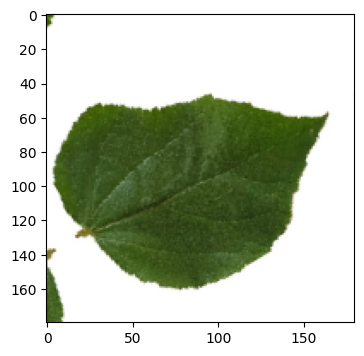

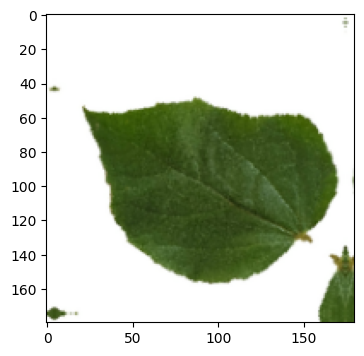

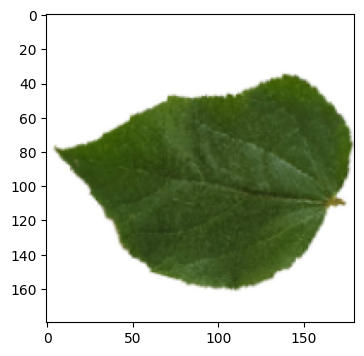

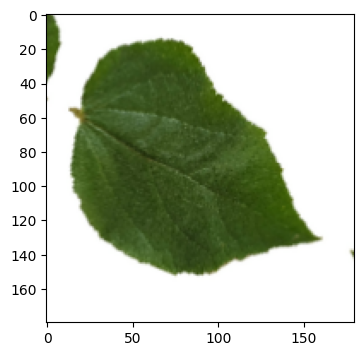

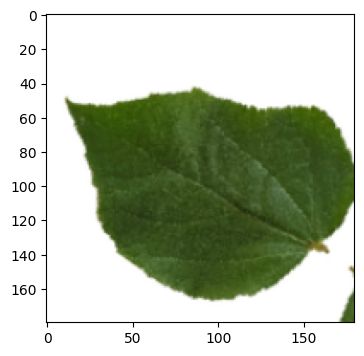

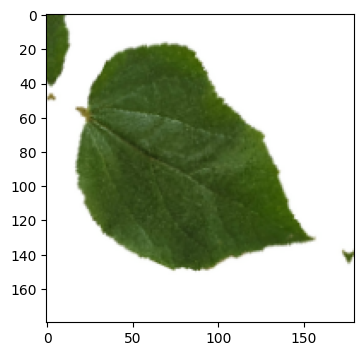

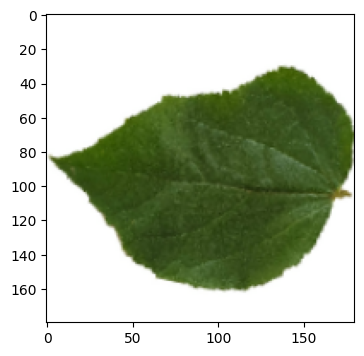

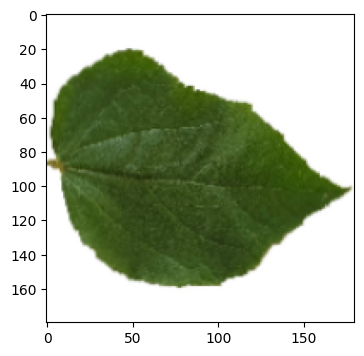

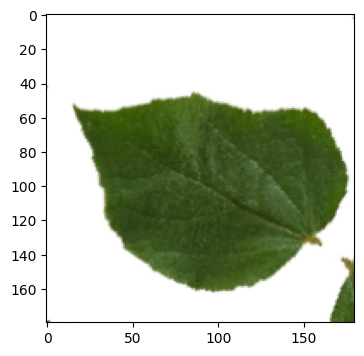

In [ ]:
# Show images in different frames
for images, labels in train_ds.take(1):  # Loop through the dataset
    for i in range(9):  # Display 9 images
        # Apply data augmentation to the images
        augmented_image = data_augmentation(images)

        # Create a new figure for each image
        fig = plt.figure(figsize=(4, 4))
        plt.imshow(augmented_image[0].numpy().astype('uint8'))  # Display the first augmented image
        plt.axis('on')  # Hide the axes for cleaner display
        plt.show(block=False)  # Non-blocking show to allow the next image to be displayed

# This ensures all images are shown in separate frames without overlap
plt.show()  # Keep all figures open until closed manually


## #MOdel Creation

In [ ]:
#### Trying for Self Attention model, plant classification model with Vision Transformers (ViT) or Attention layers.

import tensorflow as tf
from tensorflow.keras import layers, models

def simple_self_attention(x, num_heads=4, key_dim=64):
    # Apply Multi-Head Self Attention over flattened spatial dimensions
    b, h, w, c = x.shape
    x_flat = layers.Reshape((h * w, c))(x)  # (batch, sequence, channels)

    attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)
    x_attn = attention(x_flat, x_flat)  # Self-attention
    x_attn = layers.Reshape((h, w, c))(x_attn)  # Restore shape
    return x_attn

# Input
input_shape = (180, 180, 3)
inputs = layers.Input(shape=input_shape)

# Preprocessing
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

# CNN blocks
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)

x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = layers.MaxPooling2D()(x)

# Add self-attention over spatial feature map
x = simple_self_attention(x)

# Classification head
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(30, activation='softmax')(x)

# Build model
attention_model = models.Model(inputs, outputs)
attention_model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 180, 180,  │          0 │ input_layer_4[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 180, 180,  │          0 │ sequential_2[0][… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 180, 180,  │      1,792 │ rescaling_1[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 90, 90,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 90, 90,    │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 45, 45,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 45, 45,    │    295,168 │ max_pooling2d_4[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 22, 22,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 484, 256)  │          0 │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 484, 256)  │    263,168 │ reshape_2[0][0],  │
│ (MultiHeadAttentio… │                   │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_3 (Reshape) │ (None, 22, 22,    │          0 │ multi_head_atten… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ reshape_3[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     32,896 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 30)        │      3,870 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 670,750 (2.56 MB)

 Trainable params: 670,750 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

ADAM OPTIMIZER

In [ ]:
history = model.fit(train_ds, epochs=25, validation_data=val_ds)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


46/46 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.0621 - loss: 3.3960 - val_accuracy: 0.0654 - val_loss: 3.3913
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 113ms/step - accuracy: 0.0624 - loss: 3.3830 - val_accuracy: 0.0654 - val_loss: 3.3749
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.0692 - loss: 3.3735 - val_accuracy: 0.0899 - val_loss: 3.1579
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.0816 - loss: 3.1792 - val_accuracy: 0.0817 - val_loss: 2.9743
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.1001 - loss: 3.0183 - val_accuracy: 0.0845 - val_loss: 2.8840
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.1083 - loss: 2.9466 - val_accuracy: 0.1526 - val_loss: 2.8195
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.1089 - loss: 2.8789 - val_accuracy: 0.1172 - val_loss: 2.8056
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.1413 - loss: 2.8610 - val_accuracy: 0.1526 - val_

In [ ]:

from tensorflow.keras import backend as K

# Precision
def precision(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary outputs
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)  # True positives
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)  # False positives
    precision = tp / (tp + fp + K.epsilon())  # Avoid division by zero
    return K.mean(precision)  # Return mean precision across all classes

# Recall
def recall(y_true, y_pred):
    y_pred = tf.round(y_pred)  # Convert probabilities to binary outputs
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)  # True positives
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)  # False negatives
    recall = tp / (tp + fn + K.epsilon())  # Avoid division by zero
    return K.mean(recall)  # Return mean recall across all classes


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy', precision, recall]  # Add precision and recall as metrics
)


In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

# Choose optimizer: 'adam', 'sgd', 'rmsprop', 'adagrad'
optimizer_choice = 'adam'  # Change this as needed

optimizer_dict = {
    'adam': Adam(),

}

optimizer = optimizer_dict[optimizer_choice]

model = attention_model
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy', precision, recall]  # Include additional metrics as needed
)

In [ ]:
classify_images('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/Carissa Carandas (Karanda)/CC-S-013.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


'The Image belongs to Basella Alba (Basale) with a score of 3.9033074'

In [ ]:
model.save('Plant_Recog_Model.h5')

LAYER FREEZING

In [ ]:
from keras.models import load_model

# If you have a custom attention layer, define or import it first
# from your_attention_layer import AttentionLayer

# Load the model with custom attention layer if needed
model = load_model("/content/Plant_Recog_Model.h5")  # Add custom_objects={'AttentionLayer': AttentionLayer} if needed


CONFUSION MATRIX

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


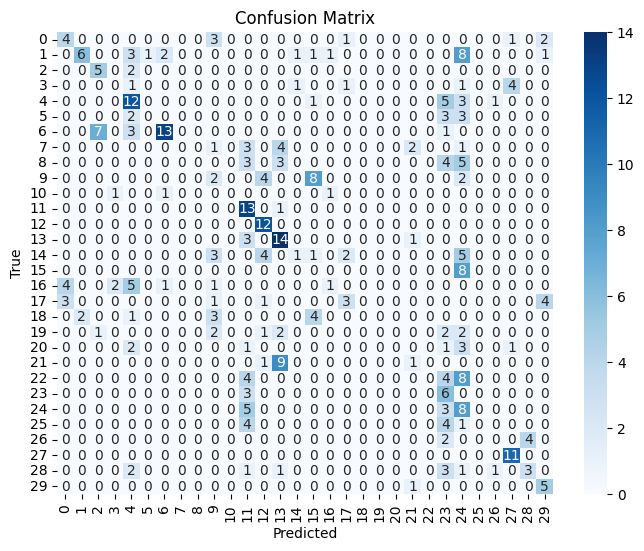

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get y_true labels from val_ds
y_true_labels = []
for images, labels in val_ds:
    y_true_labels.extend(labels.numpy())

# If y_pred is not already a NumPy array, convert it
y_pred = []
for images, labels in val_ds:  # Assuming 'val_ds' is your validation dataset
    predictions = model.predict(images)  # Get model predictions
    predicted_labels = np.argmax(predictions, axis=1)  # Get predicted class labels
    y_pred.extend(predicted_labels)

# Ensure y_true_labels and y_pred have the same length
num_samples = min(len(y_true_labels), len(y_pred))
y_true_labels = y_true_labels[:num_samples]
y_pred = y_pred[:num_samples]

cm = confusion_matrix(y_true_labels, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

TRAINING & VALIDATION ACCURACY & LOSS GRAPHS

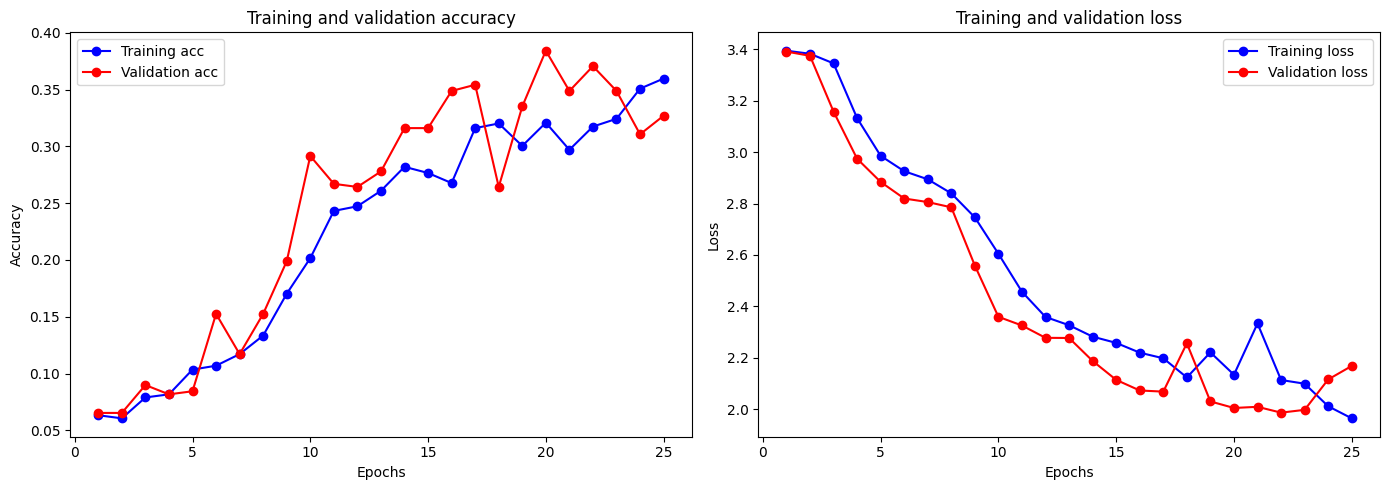

In [ ]:
# Plot training & validation accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plot function with your history object
plot_history(history)

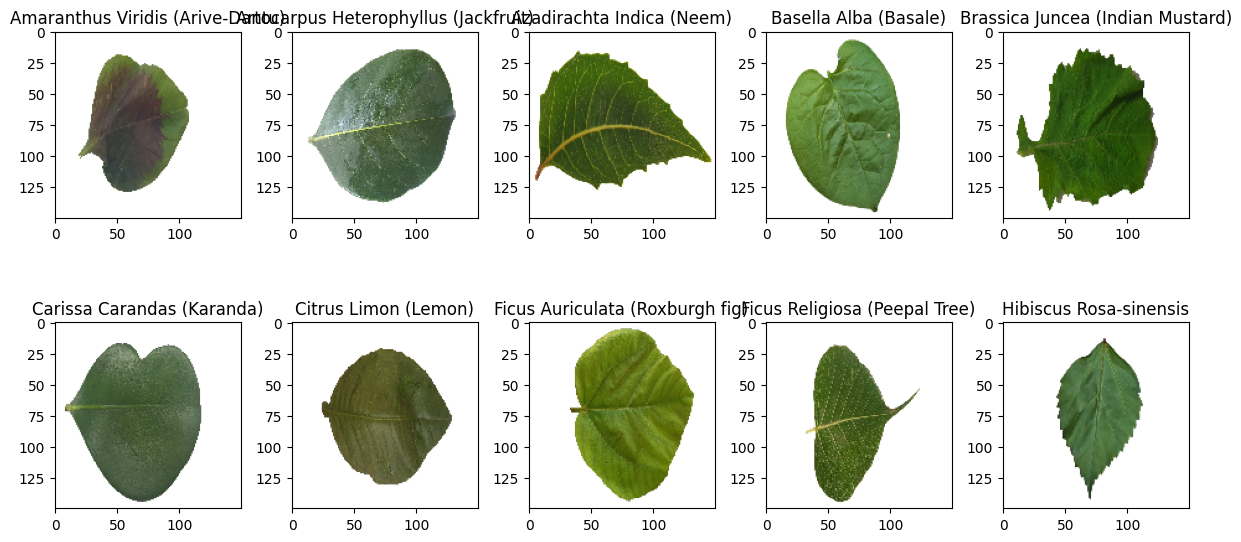

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

# Get a list of all subfolders (classes) in your image directory
base_dir = '/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images/'
folders = os.listdir(base_dir)  # Assuming each subfolder is a class

# Create a dictionary to store class names and their image counts
class_counts = {}
for folder in folders:
    class_counts[folder] = len(os.listdir(os.path.join(base_dir, folder)))

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, folder in enumerate(list(class_counts.keys())[:10]):
    img_path = os.path.join(base_dir, folder, os.listdir(os.path.join(base_dir, folder))[0])
    img = load_img(img_path, target_size=(150, 150))
    axes[i//5, i%5].imshow(img)
    axes[i//5, i%5].set_title(folder)
    axes[i//5, i%5].axis('on')
plt.tight_layout()
plt.show()

In [ ]:
# Trend Analysis (Loss & Accuracy)
def trend_analysis(history):
    epochs = range(len(history.history['accuracy']))
    accuracy_diff = np.diff(history.history['val_accuracy'])
    loss_diff = np.diff(history.history['val_loss'])

    print("Trend Analysis:")
    print("- If accuracy improves and loss decreases consistently, the model is learning well.")
    print("- If accuracy plateaus and loss fluctuates, learning is stagnating.")
    print("- If validation loss increases while training loss decreases, overfitting is occurring.")

    return accuracy_diff, loss_diff

accuracy_trend, loss_trend = trend_analysis(history)

Trend Analysis:
- If accuracy improves and loss decreases consistently, the model is learning well.
- If accuracy plateaus and loss fluctuates, learning is stagnating.
- If validation loss increases while training loss decreases, overfitting is occurring.


In [ ]:
# Pattern Identification from Confusion Matrix
def pattern_identification(c_matrix, classes):
    misclassifications = np.sum(c_matrix, axis=1) - np.diag(c_matrix)
    high_error_classes = [classes[i] for i in range(len(classes)) if misclassifications[i] > np.mean(misclassifications)]

    print("Pattern Identification:")
    print("- High error classes indicate potential dataset issues or similar class features.")
    print("- If a specific class is misclassified often, data augmentation or re-labeling might be needed.")

    return high_error_classes

# Assuming 'cm' is the confusion matrix calculated earlier
misclassified_classes = pattern_identification(cm, folders) # Pass the 'cm' variable as the 'c_matrix' argument

Pattern Identification:
- High error classes indicate potential dataset issues or similar class features.
- If a specific class is misclassified often, data augmentation or re-labeling might be needed.


In [ ]:
# Trend Analysis (Loss & Accuracy)
def trend_analysis(history):
    epochs = range(len(history.history['accuracy']))
    accuracy_diff = np.diff(history.history['val_accuracy'])
    loss_diff = np.diff(history.history['val_loss'])

    improving = np.sum(accuracy_diff > 0)
    stagnating = np.sum(accuracy_diff == 0)
    declining = np.sum(accuracy_diff < 0)

    print("Trend Analysis Results:")
    print(f"- Improving Epochs: {improving}")
    print(f"- Stagnating Epochs: {stagnating}")
    print(f"- Declining Epochs: {declining}")

    if declining > improving:
        print("- Model might be overfitting or not generalizing well.")
    elif improving > declining:
        print("- Model is learning effectively.")
    else:
        print("- Model needs tuning as it is stagnating.")

    return accuracy_diff, loss_diff

accuracy_trend, loss_trend = trend_analysis(history)

Trend Analysis Results:
- Improving Epochs: 14
- Stagnating Epochs: 2
- Declining Epochs: 8
- Model is learning effectively.


In [ ]:
# Pattern Identification from Confusion Matrix
def pattern_identification(c_matrix, classes):
    misclassifications = np.sum(c_matrix, axis=1) - np.diag(c_matrix)
    high_error_classes = [classes[i] for i in range(len(classes)) if misclassifications[i] > np.mean(misclassifications)]

    print("Pattern Identification Results:")
    print(f"- Classes with high misclassification: {high_error_classes}")

    if high_error_classes:
        print("- These classes may need more data or better feature extraction.")
    else:
        print("- No major misclassification patterns detected.")

    return high_error_classes

# Assuming 'cm' is the confusion matrix calculated earlier, pass it as 'c_matrix'
misclassified_classes = pattern_identification(cm, folders) # Changed 'c_matrix' to 'cm'

Pattern Identification Results:
- Classes with high misclassification: ['Artocarpus Heterophyllus (Jackfruit)', 'Brassica Juncea (Indian Mustard)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Syzygium Cumini (Jamun)', 'Trigonella Foenum-graecum (Fenugreek)']
- These classes may need more data or better feature extraction.


In [ ]:
# 6. Anomaly Detection (Blurry vs. Normal Images)
from tensorflow.keras.preprocessing.image import img_to_array # Import img_to_array

def detect_blurry_images(image_paths):
    blurry_images = []
    for img_path in image_paths:
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img)
        variance = np.var(img_array)
        if variance < 1000:  # Threshold for detecting blurriness
            blurry_images.append(img_path)

    print("Anomaly Detection Results:")
    print(f"- Total Blurry Images Detected: {len(blurry_images)}")
    if blurry_images:
        print("- Consider removing or enhancing blurry images for better model accuracy.")
    else:
        print("- No significant blurry images detected.")

    return blurry_images

image_paths = [os.path.join('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images', folder, img) for folder in folders for img in os.listdir(os.path.join('/content/drive/MyDrive/Colab Notebooks/Herbal garden project/Medicinal Leaf Dataset/Medicinal Leaf Dataset/Segmented Medicinal Leaf Images', folder))]

blurry_images = detect_blurry_images(image_paths)

Anomaly Detection Results:
- Total Blurry Images Detected: 0
- No significant blurry images detected.
